In [1]:
%load_ext autoreload
%autoreload 2

import tello
import detection
import depth
import cv2 
from matplotlib import pyplot as plt

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def display_frames(frames):
    fig, ax = plt.subplots(len(frames)//5, 5, figsize=(30,90))
    for rowIdx in range(len(ax)):
        for colIdx in range(len(ax[rowIdx])):
            ax[rowIdx][colIdx].set_axis_off()
            ax[rowIdx][colIdx].imshow(frames[rowIdx*len(ax[rowIdx])+colIdx])
    return fig

In [3]:
# run the following commands the very first time you run the notebook and before you 
# connect to Tello, then comment them out.
# these download the YOLO and MiDaS libraries from TorchHub. Once those are loaded, they are
# accessible for the full runtime of the container.
# detection.load_model_network()
# depth.load_model_network()

## Switch to the Tello network after this point

In [4]:
%%capture
drone = tello.Tello()

In [5]:
# The objective is to end this loop after one frame has been successfully collected.
# It doesn't do that, so you instead have to manually stop this cell's runtime.
myframe = None
for frame in drone.get_video_frames(num=1):
    myframe = frame
    break # exit after only one frame

Tello: 22:34:22.672:  Info: get video stream
Tello: 22:34:22.673:  Info: start video (cmd=0x25 seq=0x01e4)
Tello: 22:34:22.695:  Info: recv: ack: cmd=0x34 seq=0x0000 cc 60 00 27 90 34 00 00 00 00 72 a5
Tello: 22:34:22.698:  Info: recv: ack: cmd=0x20 seq=0x0000 cc 60 00 27 b0 20 00 00 00 00 42 b9
Tello: 22:34:22.700:  Info: recv: ack: cmd=0x34 seq=0x0000 cc 60 00 27 90 34 00 00 00 00 72 a5
Tello: 22:34:22.706:  Info: recv: ack: cmd=0x20 seq=0x0000 cc 60 00 27 b0 20 00 00 00 00 42 b9
Tello: 22:34:24.259:  Info: video recv: 1460 bytes 4b00 +366
Tello: 22:34:25.444:  Info: video data 827529 bytes 402.0KB/sec


non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existi

Tello: 22:34:26.425:  Info: video recv: 1460 bytes 9500 +128


no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced


Tello: 22:34:27.013:  Info: video recv: 1460 bytes a601 +122


non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced


Tello: 22:34:27.458:  Info: video data 751074 bytes 364.9KB/sec
Tello: 22:34:27.712:  Info: video recv: 1460 bytes bb05 +132


non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_sli

Tello: 22:34:28.236:  Info: video recv: 1460 bytes ce00 +107


no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced


Tello: 22:34:29.492:  Info: video data 748904 bytes 364.2KB/sec
Tello: 22:34:31.466:  Info: video data 739464 bytes 360.4KB/sec
Tello: 22:34:32.179:  Info: video recv: 1460 bytes 4600 +185
Tello: 22:34:32.292:  Info: video recv: 1460 bytes 4601 +107
Tello: 22:34:33.148:  Info: video recv: 1460 bytes 6001 +148
Tello: 22:34:33.466:  Info: video data 703967 bytes 343.7KB/sec
Tello: 22:34:33.603:  Info: video recv: 1460 bytes 6c02 +137
Tello: 22:34:35.314:  Info: video recv: 1460 bytes a201 +212
Tello: 22:34:35.480:  Info: video data 799611 bytes 387.7KB/sec
Tello: 22:34:35.965:  Info: video recv: 1460 bytes bb00 +113
Tello: 22:34:37.494:  Info: video data 751125 bytes 364.2KB/sec
Tello: 22:34:38.330:  Info: video recv: 1460 bytes 0400 +133
Tello: 22:34:39.517:  Info: video data 763576 bytes 368.8KB/sec
Tello: 22:34:40.529:  Info: video recv: 1460 bytes 3a01 +610
Tello: 22:34:40.714:  Info: video recv: 1460 bytes 4101 +141
Tello: 22:34:41.517:  Info: video data 681581 bytes 332.7KB/sec los

In [6]:
drone.drone.quit()

Tello: 22:35:04.548:  Info: quit
Tello: 22:35:04.550:  Info: state transit State::connected -> State::quit
Tello: 22:35:04.550:  Info: VideoStream.handle_event(DISCONNECTED)
Tello: 22:35:04.563:  Info: exit from the video thread.
Tello: 22:35:04.608:  Info: exit from the recv thread.


In [7]:
frame

array([[[224, 229, 222],
        [225, 230, 223],
        [225, 230, 223],
        ...,
        [134, 135, 122],
        [134, 135, 122],
        [134, 135, 122]],

       [[224, 229, 222],
        [225, 230, 223],
        [225, 230, 223],
        ...,
        [135, 136, 123],
        [135, 136, 123],
        [135, 136, 123]],

       [[225, 230, 223],
        [225, 230, 223],
        [224, 229, 222],
        ...,
        [135, 136, 123],
        [135, 136, 123],
        [135, 136, 123]],

       ...,

       [[ 29,  56,  77],
        [ 29,  56,  77],
        [ 28,  55,  76],
        ...,
        [ 21,  31,  30],
        [ 22,  32,  31],
        [ 22,  32,  31]],

       [[ 29,  56,  77],
        [ 29,  56,  77],
        [ 28,  55,  76],
        ...,
        [ 22,  32,  31],
        [ 22,  32,  31],
        [ 22,  32,  31]],

       [[ 29,  56,  77],
        [ 29,  56,  77],
        [ 28,  55,  76],
        ...,
        [ 22,  32,  31],
        [ 22,  32,  31],
        [ 22,  32,  31]]

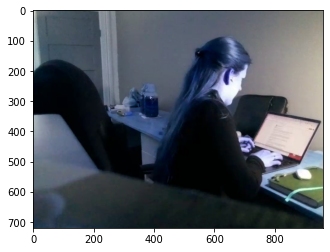

In [8]:
%matplotlib inline
plt.imshow(frame)

In [9]:
detection_frame, detections = detection.detect_objects(frame)

YOLOv5 🚀 2022-7-30 Python-3.10.5 torch-1.12.0+cu102 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


detections          xmin        ymin        xmax        ymax  confidence  class    name
0  726.541565  333.904907  953.745483  559.920044    0.776200     63  laptop
1  395.414612   89.212944  811.014648  614.125916    0.659176      0  person
2  362.285828  241.419266  416.587677  355.892273    0.624227     39  bottle
3  868.074829  524.085327  921.029663  560.607239    0.549082     64   mouse
4  752.527039  518.296021  959.584900  691.757141    0.331930     63  laptop
5  659.737305  279.659454  845.103333  420.194458    0.327504     56   chair


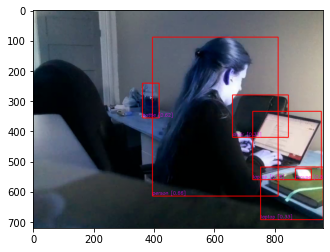

In [10]:
%matplotlib inline
plt.imshow(detection_frame)

In [12]:
depth_frame = depth.detect_depth(frame)

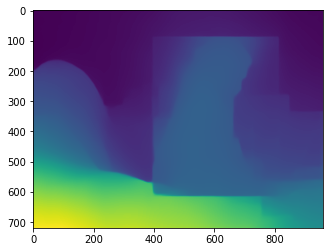

In [13]:
%matplotlib inline
plt.imshow(depth_frame)